# Исследование воронок в Senler

## Введение

Я аналитик онлайн-школы Топскул. Отдел маркетинга внедрил две новые автоматизированные воронки, однако их использование не принесло планового количества заявок. Я получил задачу исследовать воронки.

**Цель исследования**
- Исследовать воронки.

**Задачи исследования** 
- Узнать сколько пользователей доходит до заявки и покупки, а сколько — «застревает» на предыдущих шагах и на каких именно;
- Изучить открываемость, конверсии в заявку и продажу, долю отписок.

**Описание данных**
- EventName — название "шага" в воронке;
- Users - количество активных пользователей, которые продолжают получать рассылки;
- Received - количество пользователей, получивших сообщение в шаге;
- Readed - количество пользователей, прочитавших сообщение в шаге.

**Ход исследования**
- Ознакомление с данными;
- Исследование воронки `100 аргументов для сочинения` и `Вся геометрия на ЕГЭ`:
     - Рассмотрение следующих показателей: доля отписок, конверсия в заявку, конверсия в продажу;
     - Визуализация openrate каждого сообщения в шаге;
     - Визуализация воронок;
- Ответ на вопросы исследования.

## Ознакомление с данными

Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore") 
from plotly.subplots import make_subplots

Импортируем датасеты

In [2]:
events_by_users_rus = pd.read_csv('funnel_arguments.csv', sep=";")
events_by_users_geometry = pd.read_csv('funnel_geometry.csv', sep=";")

Изучим информацию о файлах

In [3]:
events_by_users_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_name  11 non-null     object
 1   users       11 non-null     int64 
 2   received    11 non-null     int64 
 3   readed      11 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 480.0+ bytes


In [4]:
events_by_users_rus

,event_name,users,received,readed
0,Сегментация,3364,6881,6535
1,Лид-магнит,3517,5444,4298
2,Курс по ИС,2720,5254,4134
3,Видео,2717,4441,1510
4,Опрос №1,2717,4439,3042
5,Подготовка к сочинению,2630,4005,2661
6,Опрос №2,2626,3849,2319
7,Оффер,2596,3680,3062
8,Заявка,152,152,152
9,Автоменеджер,91,91,91


In [5]:
events_by_users_geometry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_name  17 non-null     object
 1   users       17 non-null     int64 
 2   received    17 non-null     int64 
 3   readed      17 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 672.0+ bytes


In [6]:
events_by_users_geometry

,event_name,users,received,readed
0,Приветствие,1128,1646,1276
1,Сегментация,1122,1607,1276
2,ЛМ,682,1053,455
3,Кнопка №1,682,1053,963
4,Видео №1,682,955,573
5,Кнопка №2,690,905,382
6,Видео №2,680,881,340
7,Кнопка №3,680,851,226
8,Оффер 1,678,820,559
9,Контент 1,633,713,153


### Вывод

- С данными все в порядке, можно приступать к анализу.

## Воронка `100 аргументов для сочинения`

Добавим показатель `openrate`

In [7]:
events_by_users_rus.loc[events_by_users_rus['event_name'] == 'Подготовка к сочинению', 'event_name'] = 'Сочинение'
events_by_users_rus['openrate'] = round(events_by_users_rus['readed'] / events_by_users_rus['received'],2)
events_by_users_rus.head(8)

,event_name,users,received,readed,openrate
0,Сегментация,3364,6881,6535,0.95
1,Лид-магнит,3517,5444,4298,0.79
2,Курс по ИС,2720,5254,4134,0.79
3,Видео,2717,4441,1510,0.34
4,Опрос №1,2717,4439,3042,0.69
5,Сочинение,2630,4005,2661,0.66
6,Опрос №2,2626,3849,2319,0.60
7,Оффер,2596,3680,3062,0.83


Рассмотрим показатели оттока клиентов, конверсии в заявку и продажу

In [8]:
print(f"Доля отписок: {100 - ((3364/6881) * 100):.2f}%")
print(f"Конверсия в заявку: {(152/6881) * 100:.2f}%")
print(f"Конверсия в продажу: {(1/152) * 100:.2f}%")

Доля отписок: 51.11%
Конверсия в заявку: 2.21%
Конверсия в продажу: 0.66%


Рассмотрим openrate по шагам с помощью графика

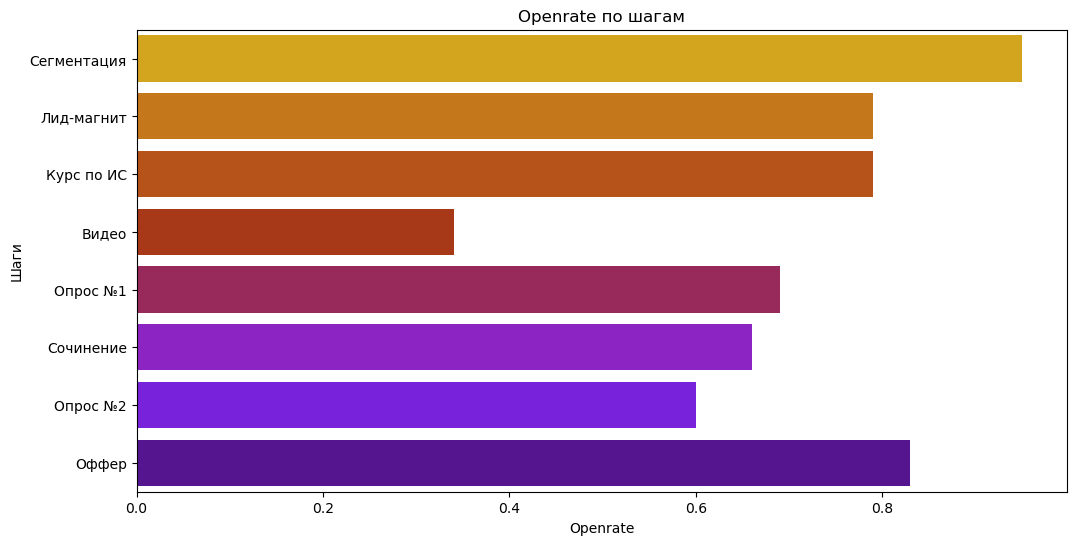

In [9]:
event_pivot = events_by_users_rus.query('event_name !="Заявка" and event_name !="Автоменеджер" and event_name !="Продаж"').sort_values(by = 'received', ascending = False)

plt.figure(figsize=(12,6))
sns.barplot(x='openrate', y='event_name', data=event_pivot, palette='gnuplot_r');
plt.xlabel('Openrate')
# plt.grid()
plt.ylabel('Шаги')
plt.title('Openrate по шагам')
plt.show();

Визуализируем воронки и наглядно рассмотрим на каких шагах мы теряем пользователей

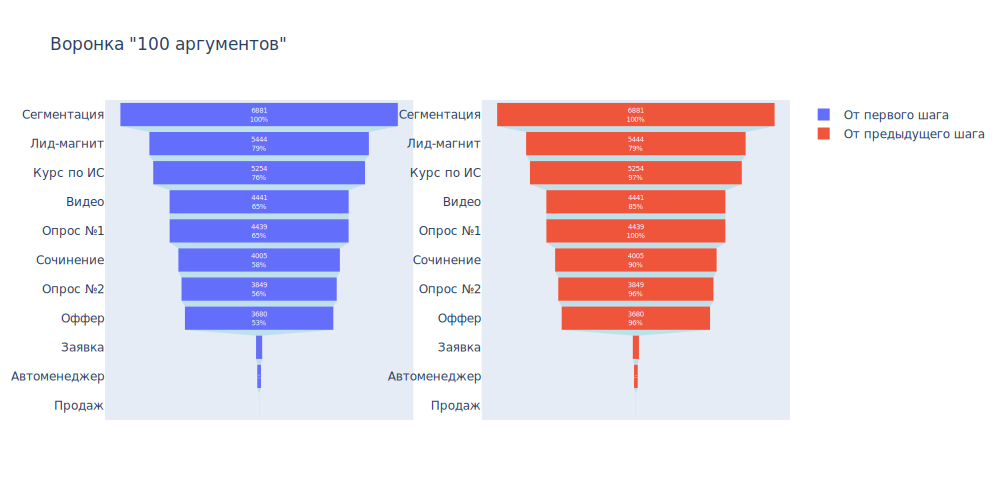

In [10]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Funnel(name = 'От первого шага',
y = (events_by_users_rus.sort_values('received', ascending=False)['event_name']),
x = (events_by_users_rus.sort_values('received', ascending=False)['received']),
textposition = "inside",
textinfo = "value+percent initial",  #value+percent previous+
connector = {"fillcolor": '#bde0eb'},
insidetextfont = {'color': 'white', 'size': 14}), row=1, col=1)

fig.add_trace(go.Funnel(name = 'От предыдущего шага',
y = (events_by_users_rus.sort_values('received', ascending=False)['event_name']),
x = (events_by_users_rus.sort_values('received', ascending=False)['received']),
textposition = "inside",
textinfo = "value+percent previous",
connector = {"fillcolor": '#bde0eb'},
insidetextfont = {'color': 'white', 'size': 14}), row=1, col=2)

fig.update_layout(title_text='Воронка "100 аргументов"')
fig.show(renderer="svg", width=1000, height=500)

### Выводы и рекомендации

- **Доля отписок:** 51.11%. 


- **Конверсии.** Конверсия в заявку: 2.21%. Конверсия в продажу: 0.66%. Учитывая конверсии в заявку и продажу, их количество -  необходима переработка оффера и УТП.


- **Чтобы повысить openrate полезных видео и контента необходимы более "яркие" названия.**
`Когда лучше всего начать подготовку к ЕГЭ по русскому языку, чтобы получить 90+ ⁉️` - слишком длинное и как показывают цифры не привлекает внимания. Возможно более короткий заголовок позволит удерживать внимание аудитории. 


- **Высокий openrate** оффера вызван тем, что пользователи не оставившие заявку, получают его снова и снова. Это может выжечь аудиторию и повлечь большое количество отписок. 

## Воронка `Вся геометрия на ЕГЭ`

Добавим показатель `openrate`

In [11]:
events_by_users_geometry['openrate'] = round(events_by_users_geometry['readed'] / events_by_users_geometry['received'],2)
events_by_users_geometry.head(15)

,event_name,users,received,readed,openrate
0,Приветствие,1128,1646,1276,0.78
1,Сегментация,1122,1607,1276,0.79
2,ЛМ,682,1053,455,0.43
3,Кнопка №1,682,1053,963,0.91
4,Видео №1,682,955,573,0.60
5,Кнопка №2,690,905,382,0.42
6,Видео №2,680,881,340,0.39
7,Кнопка №3,680,851,226,0.27
8,Оффер 1,678,820,559,0.68
9,Контент 1,633,713,153,0.21


Рассмотрим показатели конверсии и оттока клиентов

In [12]:
print(f"Доля отписок: {100 - ((1128/1646) * 100):.2f}%")
print(f"Конверсия в заявку: {(29/996) * 100:.2f}%")


Доля отписок: 31.47%
Конверсия в заявку: 2.91%


Рассмотрим `openrate` на графике

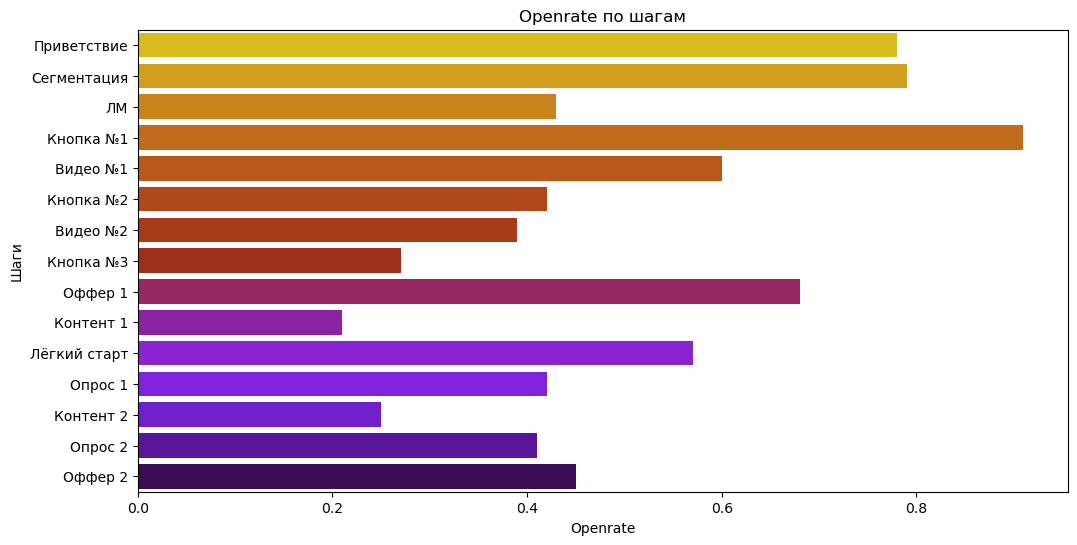

In [13]:
event_pivot_geometry = events_by_users_geometry.query('event_name !="Заявка" and event_name !="Автоменеджер" and event_name !="Продаж"').sort_values(by = 'received', ascending = False)

plt.figure(figsize=(12,6))
sns.barplot(x='openrate', y='event_name', data=event_pivot_geometry, palette='gnuplot_r');
plt.xlabel('Openrate')
#plt.grid()
plt.ylabel('Шаги')
plt.title('Openrate по шагам')
plt.show();

Визуализируем воронки и наглядно рассмотрим на каких шагах мы теряем пользователей

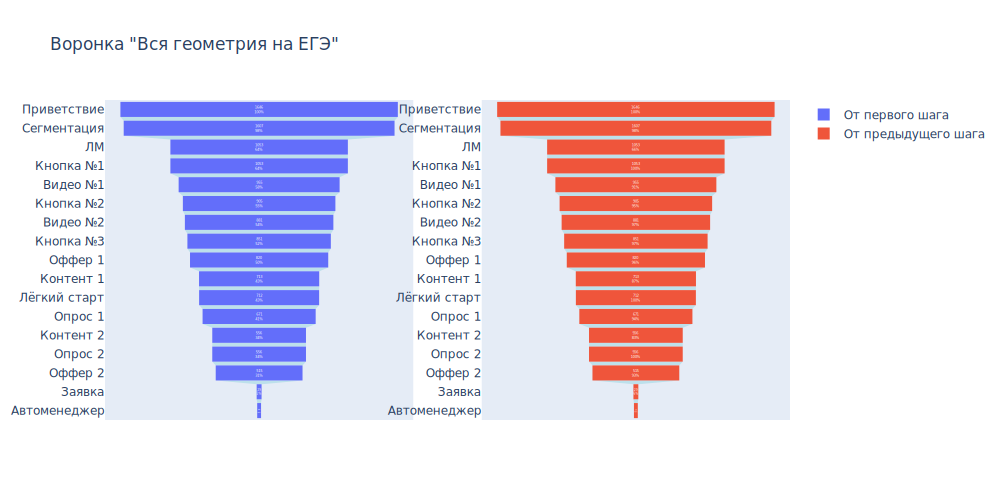

In [14]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Funnel(name = 'От первого шага',
y = (events_by_users_geometry.sort_values('received', ascending=False)['event_name']),
x = (events_by_users_geometry.sort_values('received', ascending=False)['received']),
textposition = "inside",
textinfo = "value+percent initial",  #value+percent previous+
connector = {"fillcolor": '#bde0eb'},
insidetextfont = {'color': 'white', 'size': 14}), row=1, col=1)

fig.add_trace(go.Funnel(name = 'От предыдущего шага',
y = (events_by_users_geometry.sort_values('received', ascending=False)['event_name']),
x = (events_by_users_geometry.sort_values('received', ascending=False)['received']),
textposition = "inside",
textinfo = "value+percent previous",
connector = {"fillcolor": '#bde0eb'},
insidetextfont = {'color': 'white', 'size': 14}), row=1, col=2)

fig.update_layout(title_text='Воронка "Вся геометрия на ЕГЭ"')
fig.show(renderer="svg", width=1000, height=500)

### Выводы и рекомендации

- **Доля отписок:** 31.47%;


- **Конверсии.** Конверсия в заявку: 2.91%. Продаж с воронки не было. Показатель конверсии в заявку говорит о том, что необходимо проработать УТП и оффер.


- **Падает openrate** для "шагов-кнопок", где пользователю необходимо совершить действие - нажать на кнопку "Продолжить". На мой взгляд большое количество таких шагов выглядит навязчиво. Рекомендую объединить сообщения такие как приветствие и сегментацию, прогревающие видео и предложение "продолжить воронку". Для шагов с прогревающим контентом - необходима работа с заголовками, для повышения опенрейта.

## Общий вывод

- Исследование воронок выявило высокий процент отписок, низкие конверсии и снижение опенрейта для шагов, в которых пользователь получает полезный контент. Необходима полная переработка и проведение A/B тестов.